## Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset  

Name: This column represents the name of the patient associated with the healthcare record.  
Age: The age of the patient at the time of admission, expressed in years.  
Gender: Indicates the gender of the patient, either "Male" or "Female."  
Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).  
Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.  
Date of Admission: The date on which the patient was admitted to the healthcare facility.  
Doctor: The name of the doctor responsible for the patient's care during their admission.  
Hospital: Identifies the healthcare facility or hospital where the patient was admitted.  
Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."  
Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.  
Room Number: The room number where the patient was accommodated during their admission.  
Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.  
Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.  
Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."  
Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.  

The dataset covers the period from 2019-05-08 to 2024-06-06

## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Read the data from the CSV file

In [2]:
df = pd.read_csv('data/healthcare_dataset.csv')

In [3]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.shape

(55500, 15)

### The dataset has 55500 rows and 15 columns

In [5]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

### Some columns need to change the data type (Date of Admission and Discharge Date to datetime type)

In [6]:
df.isna().any()

Name                  False
Age                   False
Gender                False
Blood Type            False
Medical Condition     False
Date of Admission     False
Doctor                False
Hospital              False
Insurance Provider    False
Billing Amount        False
Room Number           False
Admission Type        False
Discharge Date        False
Medication            False
Test Results          False
dtype: bool

### The dataset does not contain missing data

## Changing data type for Date of Admission and Discharge Date columns

In [7]:
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col])


## Bring the names of patients to a unified form

In [8]:
df['Name'] = df['Name'].str.title()

In [9]:
df.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal


## Duplicates checking

In [10]:
df.duplicated().value_counts()

False    54966
True       534
Name: count, dtype: int64

### The dataset has 534 duplicates that should be removed before further analysis

## Description of columns with numerical values

In [11]:
df['Billing Amount'].describe()

count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: Billing Amount, dtype: float64

## The largest amount for treatment is 52764 dollars, the smallest amount is -2008 dollars.  
## Average check: 25,539 dollars.  

Since we have negative values, we have to check the origin of such values ​​- is this the norm (return of the part reimbursed by the insurance company), or is it an error in entering data into the database.
To do this, we will sort the data exclusively with negative dates of payment for treatment, and then we will check randomly on an individual patient whether there is only one record or on the same dates, with the same diagnosis, but with a positive value of the amount to be paid.

In [12]:
df[df['Billing Amount'] < 0].sort_values(by='Name').head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
48994,Aaron Flowers,42,Male,A+,Asthma,2020-06-03,Ronald Patton,"Brown, Santos and Howard",Medicare,-378.696411,115,Elective,2020-06-17,Paracetamol,Inconclusive
8757,Alan Scott,48,Female,A-,Asthma,2019-10-23,Jacob Kirby,Lopez-Hughes,Medicare,-857.125933,309,Urgent,2019-11-18,Paracetamol,Abnormal
6798,Alexander Gardner,45,Male,AB-,Cancer,2023-03-23,Tracy Brown,Maldonado Group,Cigna,-198.283806,329,Elective,2023-04-09,Aspirin,Abnormal
34304,Alexander Martin,46,Male,A+,Hypertension,2021-09-24,Tracy Smith,"Carter, and Nguyen Snow",UnitedHealthcare,-38.966152,401,Emergency,2021-09-26,Lipitor,Inconclusive
5445,Alexandra Khan,32,Male,AB+,Arthritis,2022-07-14,Michael Vaughn,"Bowen Lopez, and Terry",Aetna,-692.408820,372,Elective,2022-07-19,Lipitor,Abnormal
43101,Amanda Morgan,35,Female,AB+,Hypertension,2020-09-27,Gregory Figueroa,Petersen-Hernandez,Medicare,-652.181369,144,Elective,2020-10-20,Penicillin,Abnormal
6961,Angela Allen,83,Female,B-,Diabetes,2019-08-21,Robert Kennedy,"Brown and Randolph, Young",Cigna,-43.098522,189,Urgent,2019-08-24,Penicillin,Abnormal
17642,Anthony Miller,50,Female,O+,Arthritis,2020-01-17,Jill Raymond,"Pitts, Hernandez and Wilson",Cigna,-892.270140,359,Emergency,2020-01-31,Aspirin,Abnormal
132,Ashley Erickson,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
15542,Ashley Ramsey,53,Male,AB+,Cancer,2019-05-30,James Smith,Barker-Mitchell,Blue Cross,-135.719073,235,Elective,2019-06-09,Penicillin,Inconclusive


In [13]:
df[df['Name'] == 'Ashley Ramsey']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
15542,Ashley Ramsey,53,Male,AB+,Cancer,2019-05-30,James Smith,Barker-Mitchell,Blue Cross,-135.719073,235,Elective,2019-06-09,Penicillin,Inconclusive


### According to the conducted analysis, we can state that the negative values ​​of payment amounts for treatment are an error in entering the database and such terms are subject to deletion before further analysis.

## Creating clean dataset

In [14]:
clean_data = df[df['Billing Amount'] > 0].copy(deep=True)
clean_data.drop_duplicates(inplace=True)

In [15]:
clean_data.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal


### Continue to explore numerical values

In [16]:
clean_data[['Age', 'Billing Amount']].describe()

,Age,Billing Amount
count,54860.000000,54860.000000
mean,51.533850,25594.633637
std,19.605295,14175.867041
min,13.000000,9.238787
25%,35.000000,13299.747940
50%,52.000000,25593.873000
75%,68.000000,37847.066671
max,89.000000,52764.276736


### After data cleaning and validation, we have the following values:
max Billing Amount is 52764.27 dollars, min Billing Amount is 9.23 dollars.  
Average check: 25594.63 dollars.  

The distribution of the age indicator varies from a minimum of 13 years to a maximum of 89 years. The average age of patients is 51.5 years.  

## Explore categorical values

In [17]:
clean_data[['Gender']].value_counts()

Gender
Male      27449
Female    27411
Name: count, dtype: int64

In [19]:
clean_data[['Medical Condition']].value_counts()

Medical Condition
Arthritis            9207
Diabetes             9197
Hypertension         9131
Obesity              9127
Cancer               9121
Asthma               9077
Name: count, dtype: int64

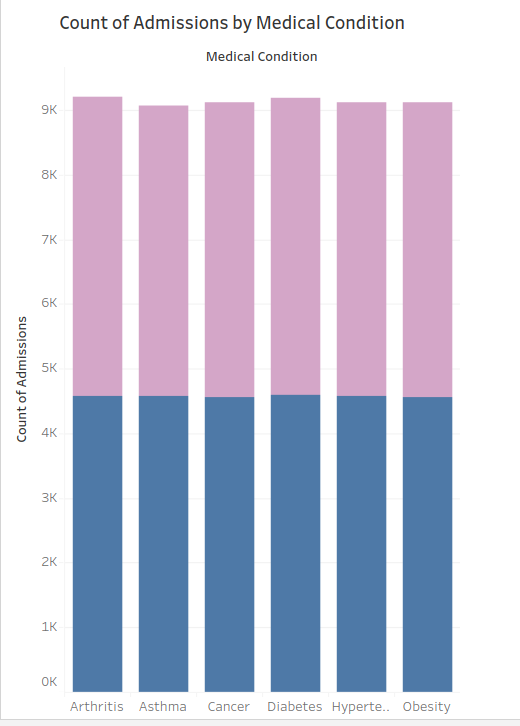

In [18]:
clean_data[['Test Results']].value_counts()

Test Results
Abnormal        18399
Normal          18302
Inconclusive    18159
Name: count, dtype: int64

### According to the analysis, the distribution of categorical data is uniform, which means that we have approximately the same number of women and men among patients. As for statistics on diagnoses, it can be noted that the number of patients with different diagnoses also has a slight difference. At the same time, the smallest number of patients have a diagnosis "Asthma", and most often come with a problem of "Arthritis"


## Let's check if there is any trend associated with years or months of visiting medical facilities.

### To do this, we create new columns with the year and month of the visit, respectively

In [20]:
clean_data['Year of Admission'] = clean_data['Date of Admission'].dt.year
clean_data['Month of Admission'] = clean_data['Date of Admission'].dt.month

In [21]:
clean_data['Year of Admission'].value_counts(sort='True')

Year of Admission
2020    11157
2023    10918
2022    10891
2021    10795
2019     7280
2024     3819
Name: count, dtype: int64

Attendance by year, by gender

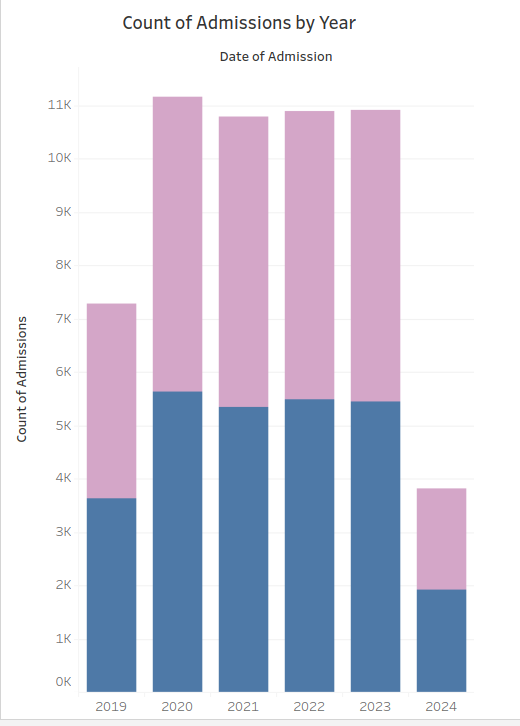

### It can be noted that the years 2019 and 2024 have the lowest number of visits. This is due to incomplete data for these years. If we focus on the years for which data for all months are available in the dataset, we can conclude that the year 2020 has the largest number of visits. This can be compared to the beginning of the COVID 19 pandemic and it can be assumed that this disease could affect existing diseases and lead to their aggravation.  
### But, in general, we can note that the distribution of visits by year is uniform.

### It is also interesting to look at the relationship between the month and the number of visits

In [34]:
clean_data.groupby(['Gender','Month of Admission'])['Medical Condition'].count()

Gender  Month of Admission
Female  1                     2364
        2                     2050
        3                     2307
        4                     2258
        5                     2257
        6                     2333
        7                     2382
        8                     2376
        9                     2287
        10                    2317
        11                    2186
        12                    2294
Male    1                     2282
        2                     2149
        3                     2303
        4                     2208
        5                     2290
        6                     2307
        7                     2380
        8                     2401
        9                     2216
        10                    2288
        11                    2315
        12                    2310
Name: Medical Condition, dtype: int64

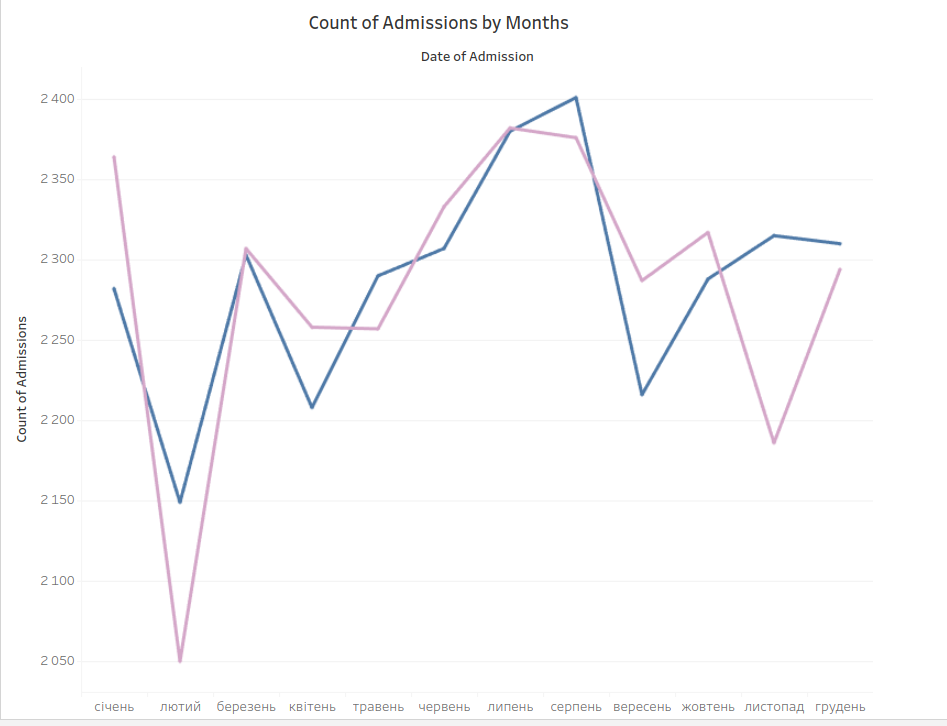

### The decrease in the number of visits in January - February and November - December can also be explained by incomplete data for 2019 and 2024. As for other years, we can see some increase in the number of visits in July - August. It can be assumed that the increase in temperature in the summer months can also provoke an increase in the number of visits to hospitals.

## Let's check whether the size of the amount for treatment depends on the diagnosis

In [23]:
clean_data.groupby('Medical Condition')['Billing Amount'].agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
Medical Condition,,,,
Arthritis,9207,25542.898356,32.626843,52170.036854
Asthma,9077,25685.385020,42.514589,52181.837792
Cancer,9121,25205.924207,9.238787,52373.032374
Diabetes,9197,25714.326349,31.030955,52211.852966
Hypertension,9131,25559.844868,68.909747,52764.276736
Obesity,9127,25859.215373,53.931445,52024.726443


### The average check does not depend on the diagnosis and varies slightly from 25205 dollars to 25859 dollars

In [24]:
clean_data.groupby('Blood Type')['Medical Condition'].count()

Blood Type
A+     6879
A-     6882
AB+    6872
AB-    6859
B+     6876
B-     6861
O+     6843
O-     6788
Name: Medical Condition, dtype: int64

### The distribution of patients by blood group is also uniform

## For a more convenient study of the age distribution of patients, let's create a new column with age intervals

In [26]:
min_age = clean_data['Age'].min()
max_age = clean_data['Age'].max()

In [27]:
bins = pd.interval_range(start=min_age, end=max_age, freq=(max_age - min_age) // 10, closed='left')

In [28]:
clean_data['Age bins'] = pd.cut(clean_data['Age'], bins=bins, include_lowest=True)

In [29]:
clean_data.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Year of Admission,Month of Admission,Age bins
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2024,1,"[27, 34)"
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019,8,"[62, 69)"
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,2022,9,"[76, 83)"


In [30]:
clean_data['Age bins'].value_counts()

Age bins
[55, 62)    5720
[62, 69)    5714
[34, 41)    5706
[48, 55)    5690
[76, 83)    5668
[41, 48)    5667
[20, 27)    5607
[69, 76)    5591
[27, 34)    5435
[13, 20)    1674
Name: count, dtype: int64

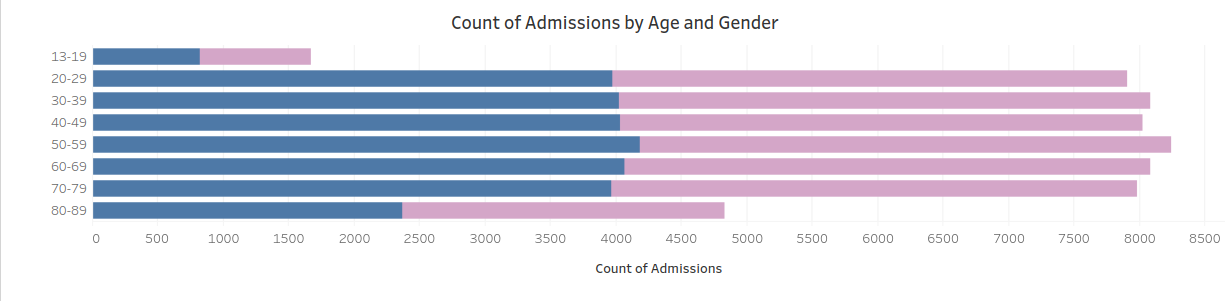

### Patients in the 13-19 age category visit the hospital least often, and patients in the 50-59 age category most often. Apart from the youngest group, representatives of other age groups apply to the hospital at almost the same level.

In [31]:
clean_data['Age bins'] = clean_data['Age bins'].astype(str)

In [32]:
clean_data[clean_data['Age bins'] == '[13, 20)']['Medical Condition'].value_counts()

Medical Condition
Arthritis       295
Cancer          282
Obesity         276
Asthma          276
Hypertension    276
Diabetes        269
Name: count, dtype: int64

### Most often, the younger age group of patients comes to the hospital for a reason Arthritis, and they are the least worried Diabetes